In [ ]:
import graphviz as gv
import numpy as np
import heapq as hq
import csv
import math

In [4]:


calles = []
nodos = []
pnodos = []

with open('/content/Data-Calles-1000.csv') as archivo:
    lector = csv.reader(archivo)
    head = next(lector)
    if head is not None:
        for row in lector:
            id,calle=row
            calles.append(calle)

with open('/content/DataSet_Nodos_lat_lon_+1000.csv') as archivo:
  add = set()
  lector = csv.reader(archivo)
  head = next(lector)
  if head is not None:
    for row in lector:
      id,c1,c2,x,y=row
      if not f"{c1},{c2}" in add and not c1 == c2:
        add.add(f"{c1},{c2}")
        add.add(f"{c2},{c1}")
        add.add(f"{c1},{c1}")
        nodos.append([c1,c2,float(x),float(y)])
        pnodos.append([c1,c2])

In [36]:
def show_am(G, vertices, directed=False):
  graph = gv.Digraph("alegria") if directed else gv.Graph("felicidad")
  n = len(G)
  for i in range(n):
    for j in range(0 if directed else i, n):
      if G[i, j] == 1:
        graph.edge(str(vertices[i]), str(vertices[j]))

  return graph

In [ ]:
def lenght(x, y, x1, y1):
  d = math.sqrt((x-x1)**2+(y-y1)**2)
  return d*100000

In [ ]:
def dijkstra(G, s, e):
  n = len(G)
  visited = [False]*n
  path = [-1]*n
  cost = [math.inf]*n

  cost[s] = 0
  pqueue = [(0, s)]
  while pqueue:
    g, u = hq.heappop(pqueue)
    if not visited[u]:
      visited[u] = True
      for v, w in G[u]:
        if not visited[v]:
          f = g + w
          if f < cost[v]:
            cost[v] = f
            path[v] = u
            hq.heappush(pqueue, (f, v))

  return path, cost

In [ ]:
nPath = []
def obtenerPath(i, path):
  if (i == -1):
    return  	
  obtenerPath(path[i], path)             
  nPath.append(i) 

In [ ]:
def solve(G, s, e):
  Opath, cost = dijkstra(G, s, e)
  obtenerPath(e, Opath)
  return nPath

In [ ]:
matriz=[]
m=[]
cont = 0
flag0 = True
flag1 = True
for i in range(len(nodos) - 1):
  for j in range(i , len(nodos) - 1):
    #while(cont < 2):
      if flag0 and nodos[i][0] == (nodos[j + 1][0] or nodos[j + 1][1]):
        d = lenght(nodos[i][2], nodos[i][3],nodos[j + 1][2], nodos[j + 1][3])
        m.append([j + 1,d])
        flag0 = False
      if flag1 and nodos[i][1] == (nodos[j + 1][1] or nodos[j + 1][0]):
        d = lenght(nodos[i][2], nodos[i][3],nodos[j + 1][2], nodos[j + 1][3])
        m.append([j + 1,d])
        flag1 = False
      #m.append(0)
     # cont += 1
    #cont = 0
  flag0 = True
  flag1 = True
  matriz.append(m)
  m=[]


G = np.array(matriz)
print(G)
print(len(G))

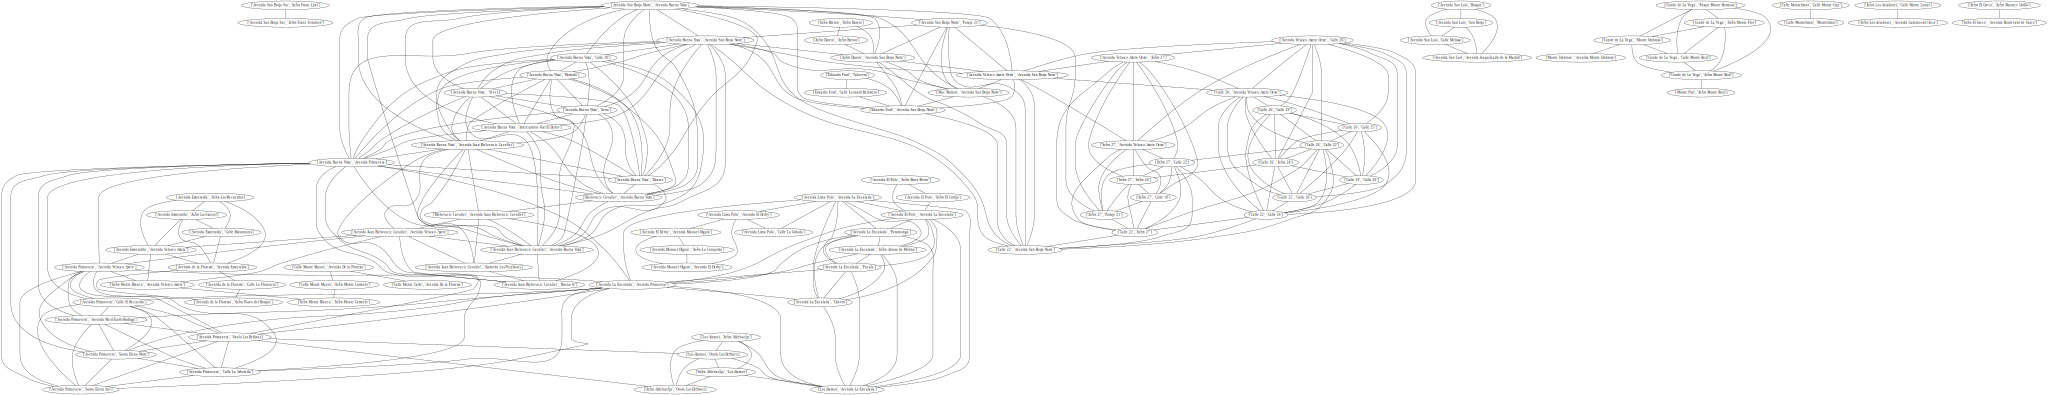

In [49]:
show_am(G,nodos)